In [32]:
import seaborn as sns
import pandas as pd
import pixiedust as px
import os

In [33]:
os.listdir("../data/")

['test.csv',
 'sales_train_v2.csv',
 'sample_submission.csv',
 'shops.csv',
 'items.csv',
 'item_categories.csv',
 'train_plus_not_imputted.csv']

In [25]:
item_cat = pd.read_csv("../data/item_categories.csv")
items = pd.read_csv("../data/items.csv")
shops = pd.read_csv("../data/shops.csv")
sales = pd.read_csv("../data/sales_train_v2.csv")
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [57]:
print("ItemId: {} / ItemName: {}".format(6675, items[items.item_id == 6675]["item_name"]))
print("ItemId: {} / ItemName: {}".format(1552, items[items.item_id == 1552]["item_name"]))

items[items.item_id == 6675]["item_name"].astype(str)

ItemId: 6675 / ItemName: 6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...
Name: item_name, dtype: object
ItemId: 1552 / ItemName: 1552    Assassin's Creed: Единство. Золотое издание (п...
Name: item_name, dtype: object


6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...
Name: item_name, dtype: object

In [43]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,total
count,2935849.0000000,2935849.0000000,2935849.0000000,2935849.0000000,2935849.0000000,2935849.0000000
mean,14.5699115,33.0017283,10197.2270570,890.8532327,1.2426409,1157.7320034
std,9.4229877,16.2269730,6324.2973539,1729.7996307,2.6188344,5683.6036566
min,0.0000000,0.0000000,0.0000000,-1.0000000,-22.0000000,-68970.0000000
25%,7.0000000,22.0000000,4476.0000000,249.0000000,1.0000000,249.0000000
50%,14.0000000,31.0000000,9343.0000000,399.0000000,1.0000000,449.0000000
75%,23.0000000,47.0000000,15684.0000000,999.0000000,1.0000000,1078.2000000
max,33.0000000,59.0000000,22169.0000000,307980.0000000,2169.0000000,1829990.0000013


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [47]:
pd.options.display.float_format = '{:.2f}'.format
sales["total"] =  sales["item_price"] * sales["item_cnt_day"]
sales.sort_values(by="total", ascending=False)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total
1107225,29.11.2013,10,42,6675,18118.71,101.00,1829990.00
1051524,29.11.2013,10,31,6675,18245.56,90.00,1642100.00
1077553,29.11.2013,10,25,6675,18190.00,85.00,1546150.00
1057915,29.11.2013,10,12,6675,18073.69,84.00,1518190.00
1081789,29.11.2013,10,18,6675,18305.07,73.00,1336270.00
1163117,19.12.2013,11,12,6675,24278.46,52.00,1262480.00
1072799,29.11.2013,10,6,6675,18198.96,67.00,1219330.00
2625804,19.05.2015,28,12,10212,8499.00,140.00,1189860.00
2608040,14.04.2015,27,12,3731,1904.55,624.00,1188438.00
2864235,30.09.2015,32,12,9248,1692.53,669.00,1132300.00


KeyError: 'shop_id'

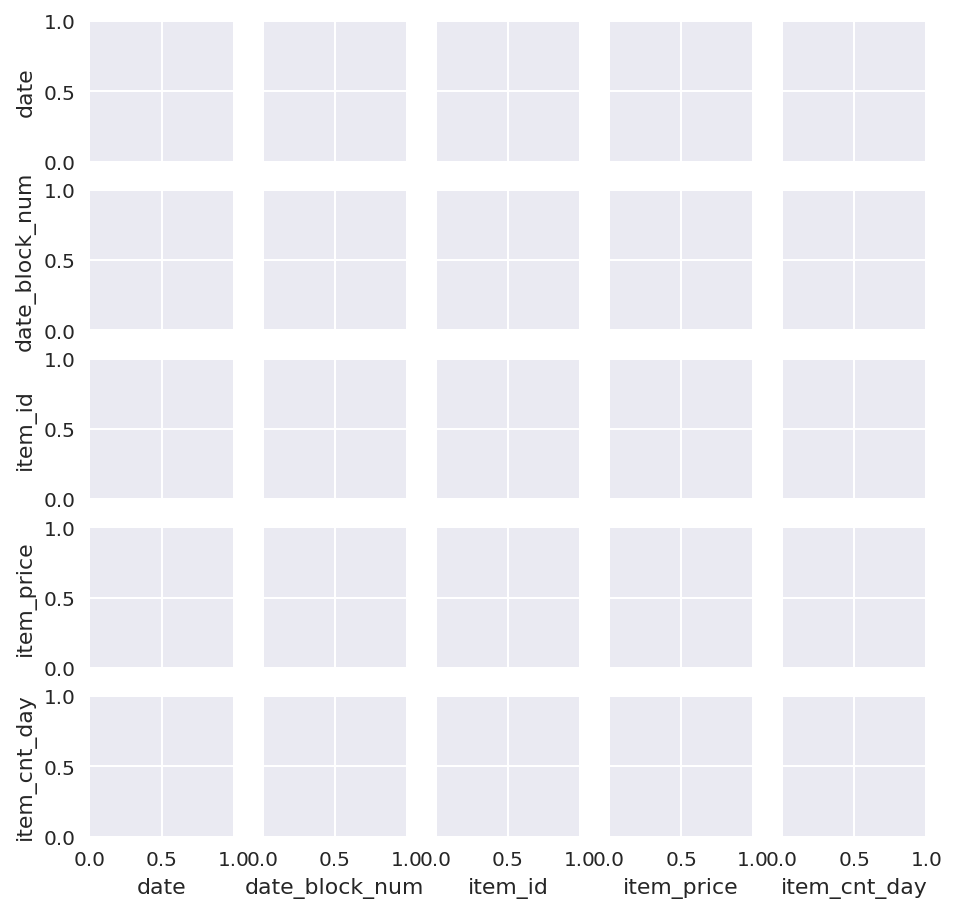

In [20]:
# %matplotlib inline
# sns.set()
# sns.pairplot(sales_grp, hue = "shop_id", size=1.5)

In [13]:
pixiedust.display(sales)

date,date_block_num,shop_id,item_id,item_price,item_cnt_day
26.01.2013,0,1,2956,452.0,1.0
12.06.2013,5,57,13811,399.0,5.0
04.09.2014,20,35,13612,599.0,1.0
02.04.2015,27,31,21367,749.0,1.0
02.03.2015,26,57,3077,1199.0,1.0
09.02.2015,25,48,7852,249.0,1.0
04.02.2015,25,55,2998,2064.0,2.0
10.05.2015,28,42,15478,1099.0,1.0
04.01.2013,0,45,2680,899.0,1.0
02.11.2014,22,53,7172,2799.0,1.0
